## Solutions

### Exercise 1

This code solves the “Offer Distribution Unknown” model by iterating on
a guess of the reservation wage function

You should find that the run time is shorter than that of the value
function approach

Similar to above, we set up a function to iterate with `Q` to find the fixed point

In [9]:
def solve_wbar(sp,
               use_parallel=True,
               tol=1e-4,
               max_iter=1000,
               verbose=True,
               print_skip=5):

    Q = Q_factory(sp, use_parallel)

    # Set up loop
    i = 0
    error = tol + 1
    m, n = len(sp.w_grid), len(sp.π_grid)

    # Initialize w
    w = np.ones_like(sp.π_grid)

    while i < max_iter and error > tol:
        w_new = Q(w)
        error = np.max(np.abs(w - w_new))
        i += 1
        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")
        w = w_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return w_new

The solution can be plotted as follows

Error at iteration 5 is 0.021112415731042833.
Error at iteration 10 is 0.005868820758690885.


Error at iteration 15 is 0.0011946807208780275.
Error at iteration 20 is 0.00023094264659917485.

Converged in 23 iterations.


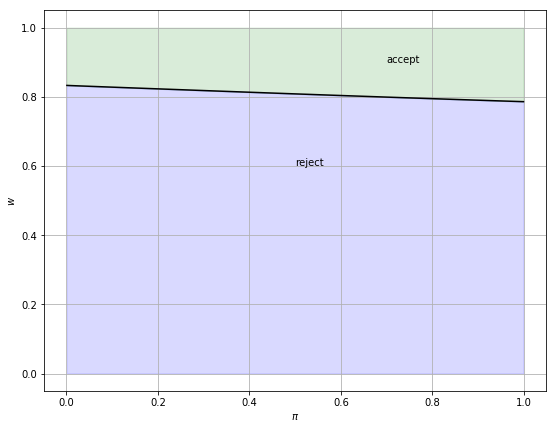

In [10]:
sp = SearchProblem()
w_bar = solve_wbar(sp)

fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(sp.π_grid, w_bar, color='k')
ax.fill_between(sp.π_grid, 0, w_bar, color='blue', alpha=0.15)
ax.fill_between(sp.π_grid, w_bar, sp.w_max, color='green', alpha=0.15)
ax.text(0.5, 0.6, 'reject')
ax.text(0.7, 0.9, 'accept')
ax.set(xlabel='$\pi$', ylabel='$w$')
ax.grid()
plt.show()